In [1]:
%pylab
%matplotlib inline
import pandas as pd
import sklearn
from sklearn import datasets
data = datasets.load_iris()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# jeu de donnees autos
autos = pd.read_csv('donnees/autos.txt', delimiter='\t')
numericAutos = autos[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

# Méthodes de segmentation
## Algorithme des k-moyennes

* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#k-means

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
X = numericAutos.as_matrix()
scaledX = scale(X)
K = 3
kmeans = KMeans(n_clusters=K).fit(scaledX)
centroids = []
for i in range(3):
    c = X[kmeans.labels_==i].mean(0)
    print('centre du groupe {} ({} observations): {}'.format(i, sum(kmeans.labels_==i), c))

centre du groupe 0 (49 observations): [1.07222449e+02 1.90342857e+02 6.88408163e+01 5.54959184e+01
 3.27663265e+03 1.72795918e+02 3.55326531e+00 3.28448980e+00
 1.12877551e+01 1.40204082e+02 4.98061224e+03 1.95918367e+01
 2.40000000e+01 2.18607986e+04]
centre du groupe 1 (80 observations): [9.47250000e+01 1.63108750e+02 6.41200000e+01 5.33537500e+01
 2.09135000e+03 9.70000000e+01 3.10500000e+00 3.21962500e+00
 1.06338750e+01 7.24375000e+01 5.21500000e+03 3.13125000e+01
 3.70375000e+01 7.67005325e+03]
centre du groupe 2 (76 observations): [9.75421053e+01 1.75060526e+02 6.58986842e+01 5.29736842e+01
 2.57931579e+03 1.28802632e+02 3.42223684e+00 3.27460526e+00
 8.88697368e+00 1.14572632e+02 5.12435184e+03 2.24342105e+01
 2.84868421e+01 1.34562912e+04]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


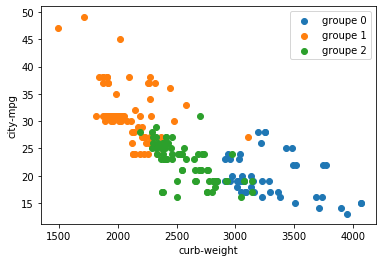

In [4]:
def plotClusters(K, labels, data, xname, yname):
    figure()
    for i in range(K):
        scatter(data.loc[labels==i, xname], data.loc[labels==i, yname], 
                label = 'groupe {}'.format(i))
    legend()
    xlabel(xname)
    ylabel(yname)
plotClusters(K, kmeans.labels_, autos, 'curb-weight', 'city-mpg')

## Méthodes de classification hiérarchique ascendante
* page du module scikit-learn http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

centre du groupe 0 (28 observations): [1.04885714e+02 1.87525000e+02 6.90785714e+01 5.40178571e+01
 3.40732143e+03 2.02321429e+02 3.62142857e+00 3.37357143e+00
 1.32892857e+01 1.60107143e+02 4.88214286e+03 1.92857143e+01
 2.37857143e+01 2.77675761e+04]
centre du groupe 1 (120 observations): [9.92600000e+01 1.76493333e+02 6.59991667e+01 5.40016667e+01
 2.60502500e+03 1.24416667e+02 3.38650000e+00 3.23966667e+00
 8.70175000e+00 1.08921000e+02 5.17875617e+03 2.27750000e+01
 2.83750000e+01 1.24663511e+04]
centre du groupe 2 (57 observations): [9.46859649e+01 1.62284211e+02 6.41578947e+01 5.29982456e+01
 2.03303509e+03 9.51052632e+01 3.06701754e+00 3.23087719e+00
 1.16300000e+01 6.70000000e+01 5.13245614e+03 3.32807018e+01
 3.91754386e+01 7.61416246e+03]


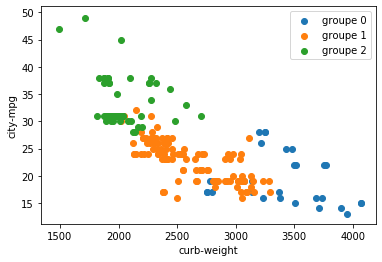

In [5]:
from sklearn.cluster import AgglomerativeClustering
K = 3
hac = AgglomerativeClustering(n_clusters=K, linkage = "complete").fit(scaledX)
centroids = []
for i in range(3):
    c = X[hac.labels_==i].mean(0)
    print('centre du groupe {} ({} observations): {}'.format(i, sum(hac.labels_==i), c))
plotClusters(K, hac.labels_, autos, 'curb-weight', 'city-mpg')